# STA 141B: Homework 4
Winter 2018

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1__ (20 pts)

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [92]:
import requests
import pandas as pd
import string
import numpy as np

#The function takes the term needed to be search and returns the search result 
def ndb_search(search_item):
    #list the url, learned the url format from the website given. Use the sort way = r and format= json. 
    url = "https://api.nal.usda.gov/ndb/search/?format=json&q=" + search_item.replace(" ", "%20") + "&sort=r&api_key=SJzehm2mpVeVIpFIxSPjQRS0HhqlUV69pQBtvyyx"
    output = requests.get(url)
    return output.json()['list']['item'] #returns the search output. 

In [93]:
ndb_search("quail eggs")

[{'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'offset': 0},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': "D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  'ndbno': '45178254',
  'offset': 1},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'offset': 2},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'offset': 3},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'offset': 4},
 {'ds': 'SR',
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'offset': 5}]

In [139]:
ndb_search("collard greens")

[{'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'KW COLLARDS, COLLARD GREENS, ORIGINAL, UPC: 628586539778',
  'ndbno': '45168559',
  'offset': 0},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'APPLE, CELERY, CUCUMBER, KALE COLLARD GREENS LEMON GINGER NOON GREENS, UPC: 854208005233',
  'ndbno': '45138187',
  'offset': 1},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'SUJA, ELEMENTS, KING OF GREENS JUICE, APPLE, CELERY, CUCUMBER, KALE, COLLARD GREENS, LEMON, GINGER, SPINACH, CHLORELLLA, SPIRULINA, UPC: 094922452016',
  'ndbno': '45167706',
  'offset': 2},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'POWER GREENS FRESH COLLARD GREENS, UPC: 030223040873',
  'ndbno': '45209809',
  'offset': 3},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'SEASONED SUPER GREENS SPINACH, COLLARD GREENS, KALE, LEMON JUICE, UPC: 855500002456',
  'ndbno': '45281679',
  'offset': 4},
 {'ds': 'BL'

__Exercise 1.2__ (20 pts)

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [168]:
#The function takes the search item and returns the name and number of it. 
def ndb_search2(search_item):
    search_item = search_item.replace("_", "%20") #since there is some like turnip_greens in excel, but there is no space. So only consider _
    #type the url by the method given in website
    #use the standard reference because foods are unbranded.
    url = "https://api.nal.usda.gov/ndb/search/?format=json&q=" + search_item + "&ds=Standard%20Reference&sort=r&api_key=SJzehm2mpVeVIpFIxSPjQRS0HhqlUV69pQBtvyyx"
    output = requests.get(url)
    #consider the situation when the search result is successful:
    if ('errors' not in output.json()):
        temp = output.json()['list']['item'] #get the search result 
        for i in temp:
            if ", raw" in i['name']:  #select them by raw,since our lists foods are raw
                #since these words are not appearing in our list
                #For example: Swamp is for cabbage
                if ('Beverages' in i['group']) or ('leaves' in i['group']) or ('juice' in i['group']) or ('Chips' in i['group']) or ('Swamp' in i['name']): 
                    continue   
                return [i['name'], i['ndbno']] #return the name and the no. 
        return [np.nan, np.nan]
    else: #condition when there is error in search 
        return [np.nan, np.nan]

In [169]:
result=[]
# Read the food list
excellist = pd.read_csv('fresh.csv', sep = ',')

# establish the dataframe
result = pd.DataFrame(columns=('Food', 'name in NDB', 'NDB No.'))
result['Food'] = excellist['food']

# Save the result of ndb_search2
temp = [ndb_search2(str(f)) for f in result['Food']]

# Fill in the dataframe
result['name in NDB'] = [x[0] for x in temp]
result['NDB No.'] = [x[1] for x in temp]
temp

[['Watermelon, raw', '09326'],
 ['Melons, cantaloupe, raw', '09181'],
 ['Tangerines, (mandarin oranges), raw', '09218'],
 ['Strawberries, raw', '09316'],
 ['Plums, raw', '09279'],
 ['Oranges, raw, California, valencias', '09201'],
 ['Raspberries, raw', '09302'],
 ['Pomegranates, raw', '09286'],
 ['Pineapple, raw, all varieties', '09266'],
 ['Apricots, raw', '09021'],
 ['Melons, honeydew, raw', '09184'],
 ['Papayas, raw', '09226'],
 [nan, nan],
 ['Cherries, sour, red, raw', '09063'],
 ['Bananas, raw', '09040'],
 ['Apples, raw, with skin', '09003'],
 ['Peaches, yellow, raw', '09236'],
 ['Nectarines, raw', '09191'],
 ['Pears, raw', '09252'],
 ['Grapefruit, raw, white, California', '09117'],
 ['Blackberries, raw', '09042'],
 ['Grapes, muscadine, raw', '09129'],
 ['Blueberries, raw', '09050'],
 ['Mangos, raw', '09176'],
 ['Asparagus, raw', '11011'],
 ['Cucumber, with peel, raw', '11205'],
 ['Cucumber, with peel, raw', '11205'],
 ['Lettuce, iceberg (includes crisphead types), raw', '11252'],

In [170]:
result

,Food,name in NDB,NDB No.
0,watermelon,"Watermelon, raw",09326
1,cantaloupe,"Melons, cantaloupe, raw",09181
2,tangerines,"Tangerines, (mandarin oranges), raw",09218
3,strawberries,"Strawberries, raw",09316
4,plums,"Plums, raw",09279
5,oranges,"Oranges, raw, California, valencias",09201
6,raspberries,"Raspberries, raw",09302
7,pomegranate,"Pomegranates, raw",09286
8,pineapple,"Pineapple, raw, all varieties",09266
9,apricots,"Apricots, raw",09021


__Exercise 1.3__ (20 pts)

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [158]:
#the function takes the ndb no and returns the nutrition details from the web
def ndb_report(ndbno): 
    #same as above, get the url
    url = "https://api.nal.usda.gov/ndb/V2/reports?ndbno=" + str(ndbno) + "&format=json&api_key=SJzehm2mpVeVIpFIxSPjQRS0HhqlUV69pQBtvyyx"
    output = requests.get(url)
    return output.json()['foods'][0]['food']['nutrients'] #returns the nutrition paragraph we want. Not all, too messy

In [157]:
ndb_report("09279")

[{'derivation': 'NONE',
  'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g',
    'label': 'cup, sliced',
    'qty': 1.0,
    'value': '143.93'},
   {'eqv': 66.0,
    'eunit': 'g',
    'label': 'fruit (2-1/8" dia)',
    'qty': 1.0,
    'value': '57.57'},
   {'eqv': 151.0,
    'eunit': 'g',
    'label': 'NLEA serving',
    'qty': 1.0,
    'value': '131.72'}],
  'name': 'Water',
  'nutrient_id': '255',
  'unit': 'g',
  'value': '87.23'},
 {'derivation': 'NC',
  'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g',
    'label': 'cup, sliced',
    'qty': 1.0,
    'value': '76'},
   {'eqv': 66.0,
    'eunit': 'g',
    'label': 'fruit (2-1/8" dia)',
    'qty': 1.0,
    'value': '30'},
   {'eqv': 151.0,
    'eunit': 'g',
    'label': 'NLEA serving',
    'qty': 1.0,
    'value': '69'}],
  'name': 'Energy',
  'nutrient_id': '208',
  'unit': 'kcal',
  'value': '46'},
 {'derivation': 'NONE',
  'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g

In [113]:
ndb_report("09326")

[{'derivation': 'NONE',
  'group': 'Proximates',
  'measures': [{'eqv': 154.0,
    'eunit': 'g',
    'label': 'cup, balls',
    'qty': 1.0,
    'value': '140.83'},
   {'eqv': 152.0,
    'eunit': 'g',
    'label': 'cup, diced',
    'qty': 1.0,
    'value': '139.00'},
   {'eqv': 4518.0,
    'eunit': 'g',
    'label': 'melon (15" long x 7-1/2" dia)',
    'qty': 1.0,
    'value': '4131.71'},
   {'eqv': 286.0,
    'eunit': 'g',
    'label': 'wedge (approx 1/16 of melon)',
    'qty': 1.0,
    'value': '261.55'},
   {'eqv': 122.0,
    'eunit': 'g',
    'label': 'watermelon balls',
    'qty': 10.0,
    'value': '111.57'},
   {'eqv': 280.0,
    'eunit': 'g',
    'label': 'NLEA serving',
    'qty': 1.0,
    'value': '256.06'}],
  'name': 'Water',
  'nutrient_id': '255',
  'unit': 'g',
  'value': '91.45'},
 {'derivation': 'NC',
  'group': 'Proximates',
  'measures': [{'eqv': 154.0,
    'eunit': 'g',
    'label': 'cup, balls',
    'qty': 1.0,
    'value': '46'},
   {'eqv': 152.0,
    'eunit': 'g',

__Exercise 1.4__ (20 pts) Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [118]:

for i in result['NDB No.']:
    # If ndbno exist, get the nutrition of energy, else just ignores
nutrition = []
    if (pd.isnull(i)):
        nutrition.append(np.nan)
    else:
        nutrition.append(float(ndb_report(i)[1]['value']))  #kcal, energy is at the second of the list so use [1] 

        

# Put the nutrition, price, and yield together into one data frame
result['nutrition'] = nutrition
result['price'] = excellist['price_per_lb']
result['yield'] = excellist['yield']
# Delete the rows that do not have nutrition
result_final = result[-pd.isnull(result['nutrition'])].reset_index(drop=True)
result_final

,Food,name in NDB,NDB No.,energy,price,yield,nutrition
0,watermelon,"Watermelon, raw",09326,30.0,0.333412,0.520000,30.0
1,cantaloupe,"Melons, cantaloupe, raw",09181,34.0,0.535874,0.510000,34.0
2,tangerines,"Tangerines, (mandarin oranges), raw",09218,53.0,1.377962,0.740000,53.0
3,strawberries,"Strawberries, raw",09316,32.0,2.358808,0.940000,32.0
4,plums,"Plums, raw",09279,46.0,1.827416,0.940000,46.0
5,oranges,"Oranges, raw, California, valencias",09201,49.0,1.035173,0.730000,49.0
6,raspberries,"Raspberries, raw",09302,52.0,6.975811,0.960000,52.0
7,pomegranate,"Pomegranates, raw",09286,83.0,2.173590,0.560000,83.0
8,pineapple,"Pineapple, raw, all varieties",09266,50.0,0.627662,0.510000,50.0
9,apricots,"Apricots, raw",09021,48.0,3.040072,0.930000,48.0


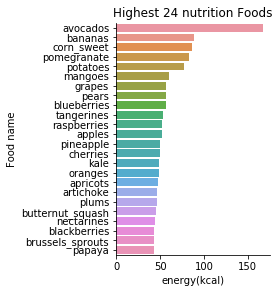

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot the first bar plot base on the order of the energy 
first_graph = result_final.sort_values('nutrition', ascending = False)[0:24]
ax = sns.factorplot("nutrition", "Food", data = first_graph, kind = "bar")
ax.set(xlabel='energy(kcal)', ylabel='Food name')
plt.title('Highest 24 nutrition Foods')
plt.show()

In [127]:
result_final["yield"].mean()

0.7744362942957661

In [128]:
result_final["nutrition"].mean()

44.40425531914894

In [126]:
result_final["price"].mean()

1.9390861994681285

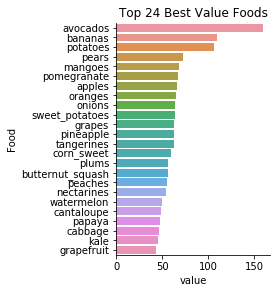

In [129]:
result_final['value'] = result_final["nutrition"] + 50 * result_final["yield"] - 20 * result_final["price"]
second_graph = result_final.sort_values('value', ascending = False)[0:24]
sns.factorplot("value", "Food", data = second_graph, kind = "bar")
plt.title('Top 24 Best Value Foods')
plt.show()

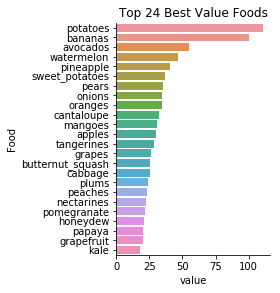

In [171]:
result_final['value'] = result_final["nutrition"] *  result_final["yield"]  * 1/result_final["price"]
second_graph = result_final.sort_values('value', ascending = False)[0:24]
sns.factorplot("value", "Food", data = second_graph, kind = "bar")
plt.title('Top 24 Best Value Foods')
plt.show()

In [133]:
# I add protein, total fat and carbohydrate into the data 
result_final['protein'] = [float(ndb_report(i)[2]['value']) for i in result_final['NDB No.']]
result_final['total fat'] = [float(ndb_report(i)[3]['value']) for i in result_final['NDB No.']]
result_final['carbohydrate'] = [float(ndb_report(i)[4]['value']) for i in result_final['NDB No.']]

result_final

,Food,name in NDB,NDB No.,energy,price,yield,nutrition,value,protein,total fat,carbohydrate
0,watermelon,"Watermelon, raw",09326,30.0,0.333412,0.520000,30.0,46.788953,0.61,0.15,7.55
1,cantaloupe,"Melons, cantaloupe, raw",09181,34.0,0.535874,0.510000,34.0,32.358366,0.84,0.19,8.16
2,tangerines,"Tangerines, (mandarin oranges), raw",09218,53.0,1.377962,0.740000,53.0,28.462326,0.81,0.31,13.34
3,strawberries,"Strawberries, raw",09316,32.0,2.358808,0.940000,32.0,12.752201,0.67,0.30,7.68
4,plums,"Plums, raw",09279,46.0,1.827416,0.940000,46.0,23.661826,0.70,0.28,11.42
5,oranges,"Oranges, raw, California, valencias",09201,49.0,1.035173,0.730000,49.0,34.554620,1.04,0.30,11.89
6,raspberries,"Raspberries, raw",09302,52.0,6.975811,0.960000,52.0,7.156157,1.20,0.65,11.94
7,pomegranate,"Pomegranates, raw",09286,83.0,2.173590,0.560000,83.0,21.383974,1.67,1.17,18.70
8,pineapple,"Pineapple, raw, all varieties",09266,50.0,0.627662,0.510000,50.0,40.626965,0.54,0.12,13.12
9,apricots,"Apricots, raw",09021,48.0,3.040072,0.930000,48.0,14.683863,1.40,0.39,11.12


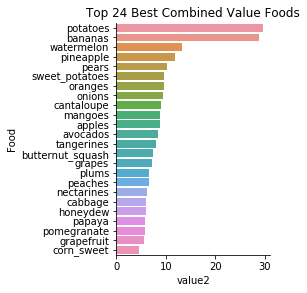

In [138]:
result_final['value2'] = (1/result_final['price']) * result_final['yield'] * ( 0.1 * result_final['nutrition'] +  0.16279 * result_final['total fat'] + 0.72093 * result_final['carbohydrate'] + 0.116279 * result_final['protein'])
third_graph = result_final.sort_values('value2', ascending = False)[0:24]
sns.factorplot("value2", "Food", data = third_graph, kind = "bar")
plt.title('Top 24 Best Combined Value Foods')
plt.show()

In [ ]:
##http://www.mydailyintake.net/daily-intake-levels